In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
df=pd.read_csv('ecommerce_dataset_updated.csv')
df.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12/11/2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,9/2/2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,1/9/2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,1/4/2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


In [52]:
df.columns


Index(['User_ID', 'Product_ID', 'Category', 'Price (Rs.)', 'Discount (%)',
       'Final_Price(Rs.)', 'Payment_Method', 'Purchase_Date'],
      dtype='object')

In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [54]:
df.describe()

,Price (Rs.),Discount (%),Final_Price(Rs.)
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


In [55]:
df.isnull().sum()

User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64

In [56]:
df['Category'] = df['Category'].fillna(df['Category'].mode()[0])
df['Payment_Method'] = df['Payment_Method'].fillna(df['Payment_Method'].mode()[0])

df['Price (Rs.)'] = df['Price (Rs.)'].fillna(df['Price (Rs.)'].median())
df['Discount (%)'] = df['Discount (%)'].fillna(df['Discount (%)'].median())
df['Final_Price(Rs.)'] = df['Final_Price(Rs.)'].fillna(df['Final_Price(Rs.)'].median())


In [57]:
#feature Engineering
df['Discount_Amount'] = df['Price (Rs.)'] * (df['Discount (%)'] / 100)


In [58]:
#Convert date into proper formate 
from dateutil import parser

df['Purchase_Date'] = df['Purchase_Date'].apply(lambda x: parser.parse(str(x), dayfirst=True))


In [59]:
df['Month'] = df['Purchase_Date'].dt.month
df['Day'] = df['Purchase_Date'].dt.day
df['Weekday'] = df['Purchase_Date'].dt.day_name()


In [60]:
df['Purchase_Date'].head(10)


0   2024-11-12
1   2024-02-09
2   2024-09-01
3   2024-04-01
4   2024-09-27
5   2024-08-08
6   2024-03-28
7   2024-05-29
8   2024-02-26
9   2024-01-11
Name: Purchase_Date, dtype: datetime64[ns]

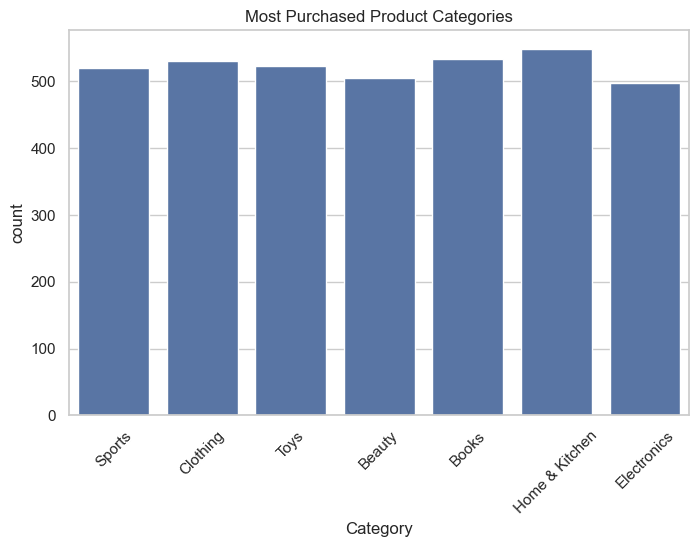

In [61]:
#Top selling product category 
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Category')
plt.title("Most Purchased Product Categories")
plt.xticks(rotation=45)
plt.show()


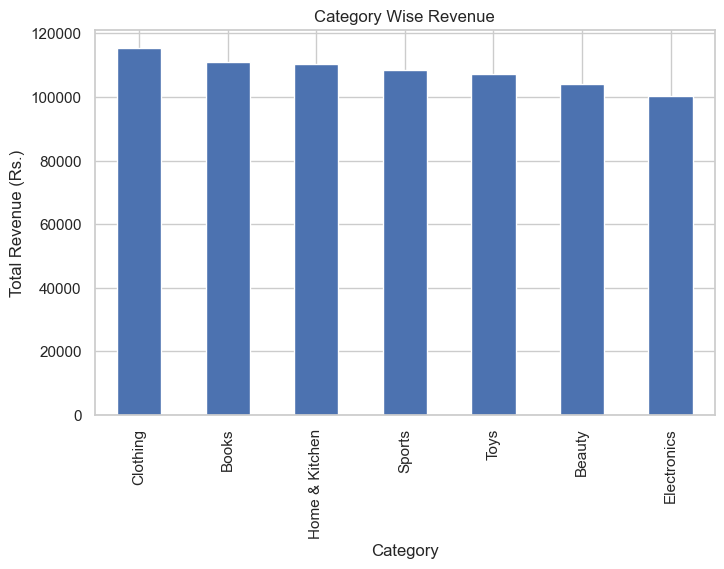

In [62]:
# revenue by category
category_revenue = df.groupby('Category')['Final_Price(Rs.)'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
category_revenue.plot(kind='bar')
plt.title("Category Wise Revenue")
plt.ylabel("Total Revenue (Rs.)")
plt.show()


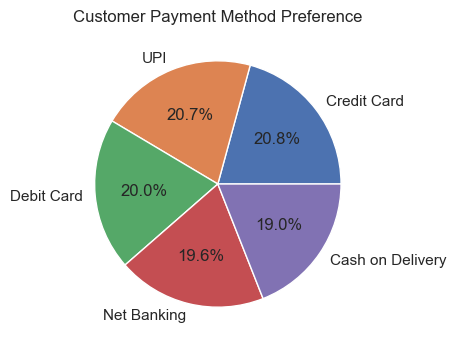

In [63]:
#payment method reference 
plt.figure(figsize=(6,4))
df['Payment_Method'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Customer Payment Method Preference")
plt.ylabel("")
plt.show()


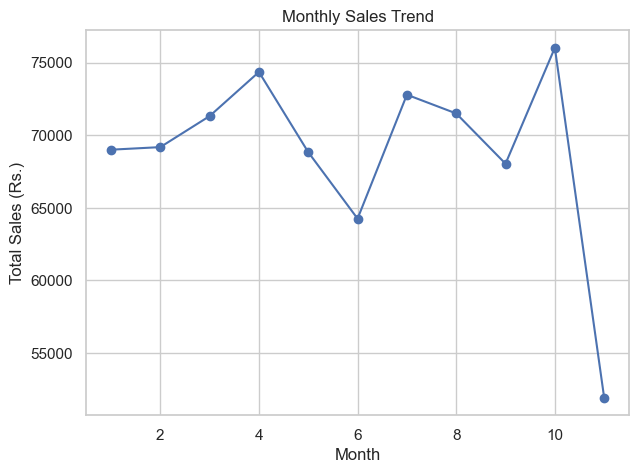

In [64]:
#monthly sales trends
monthly_sales = df.groupby('Month')['Final_Price(Rs.)'].sum()

plt.figure(figsize=(7,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales (Rs.)")
plt.show()


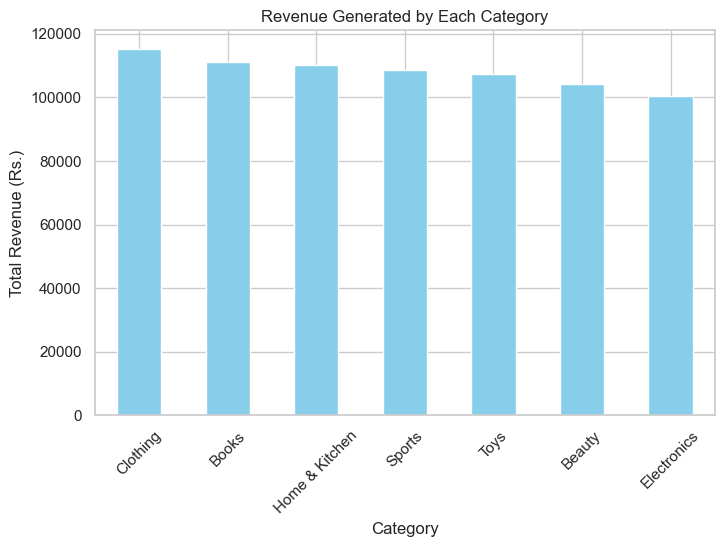

In [65]:
# category wise revenue
category_revenue = df.groupby('Category')['Final_Price(Rs.)'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
category_revenue.plot(kind='bar', color='skyblue')
plt.title("Revenue Generated by Each Category")
plt.ylabel("Total Revenue (Rs.)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()


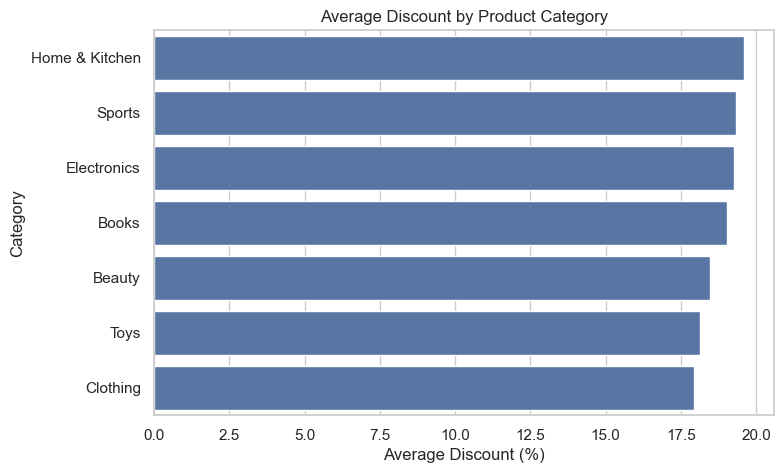

In [66]:
#Discount Analysis – Which Categories Benefit from More Discounts
avg_discount = df.groupby('Category')['Discount (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_discount.values, y=avg_discount.index)
plt.title("Average Discount by Product Category")
plt.xlabel("Average Discount (%)")
plt.ylabel("Category")
plt.show()


In [67]:
df.columns

Index(['User_ID', 'Product_ID', 'Category', 'Price (Rs.)', 'Discount (%)',
       'Final_Price(Rs.)', 'Payment_Method', 'Purchase_Date',
       'Discount_Amount', 'Month', 'Day', 'Weekday'],
      dtype='object')

In [68]:
# Eg: Diwali + Christmas
festival_months = [10, 11, 12]  # Oct, Nov, Dec
festival_sales = df[df['Purchase_Date'].dt.month.isin(festival_months)]['Final_Price(Rs.)'].sum()
non_festival_sales = df[~df['Purchase_Date'].dt.month.isin(festival_months)]['Final_Price(Rs.)'].sum()

print("Festival Sales:", festival_sales)
print("Non-Festival Sales:", non_festival_sales)


Festival Sales: 127949.59
Non-Festival Sales: 629328.49


<Axes: title={'center': ' Festival vs Non-Festival Sales'}, xlabel='Category'>

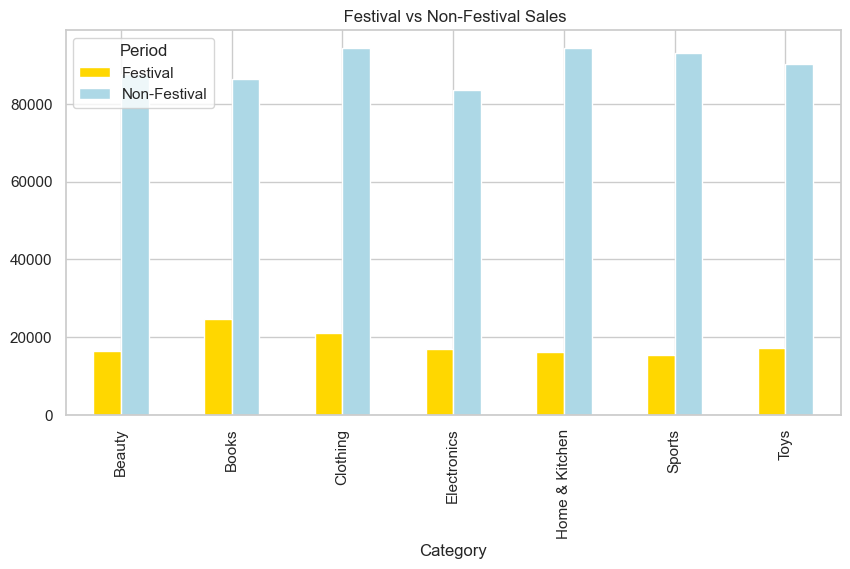

In [69]:
# festival  and non festival charts
festival_months = [10,11,12]
df['Period'] = df['Purchase_Date'].dt.month.apply(lambda x: 'Festival' if x in festival_months else 'Non-Festival')

sales_period = df.groupby(['Category','Period'])['Final_Price(Rs.)'].sum().unstack().fillna(0)
sales_period.plot(kind='bar', figsize=(10,5), color=['gold','lightblue'], title=" Festival vs Non-Festival Sales")
